# Importing Libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras as ks
import sklearn as sk
import imblearn as imb

In [ ]:
print("Numpy : {}".format(np.__version__))
print("Pandas : {}".format(pd.__version__))
print("Seaborn : {}".format(sns.__version__))
print("Computer vision : {}".format(cv2.__version__))
print("Tensorflow : {}".format(tf.__version__))
print("Kears : {}".format(ks.__version__))
print("Sklearn : {}".format(sk.__version__))
print("imblearn : {}".format(imb.__version__))

Numpy : 1.22.4
Pandas : 1.5.3
Seaborn : 0.12.2
Computer vision : 4.7.0
Tensorflow : 2.12.0
Kears : 2.12.0
Sklearn : 1.2.2
imblearn : 0.10.1


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/dataset/hmnist_28_28_RGB.csv')
data.head()

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   
3        143        103        119        171  ...         44         26   
4        215        162        191        225  ...        209        166   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166        185        154   
1         55         25         14         28         25         14   
2        143        159        124        142        136        104   
3         36         25         12         17         25         12   
4        185        172        135        149        109         78   

   pixel2351  label  
0        177      2  
1         27      2  
2        117      2  
3         15      2  
4         92      2  

[5 rows x 2353 columns]

In [ ]:
data.shape

(10015, 2353)

In [ ]:
y = data['label']
x = data.drop(columns = ['label'])

# Exploratory Data Analysis (EDA)

In [ ]:
tabular_data = pd.read_csv('/content/drive/MyDrive/dataset/HAM10000_metadata.csv')
tabular_data.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [ ]:
tabular_data.describe().T

count       mean        std  min   25%   50%   75%   max
age  9958.0  51.863828  16.968614  0.0  40.0  50.0  65.0  85.0

In [ ]:
tabular_data.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [ ]:
tabular_data.shape

(10015, 7)

Localization : ['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']


<Axes: xlabel='localization', ylabel='count'>

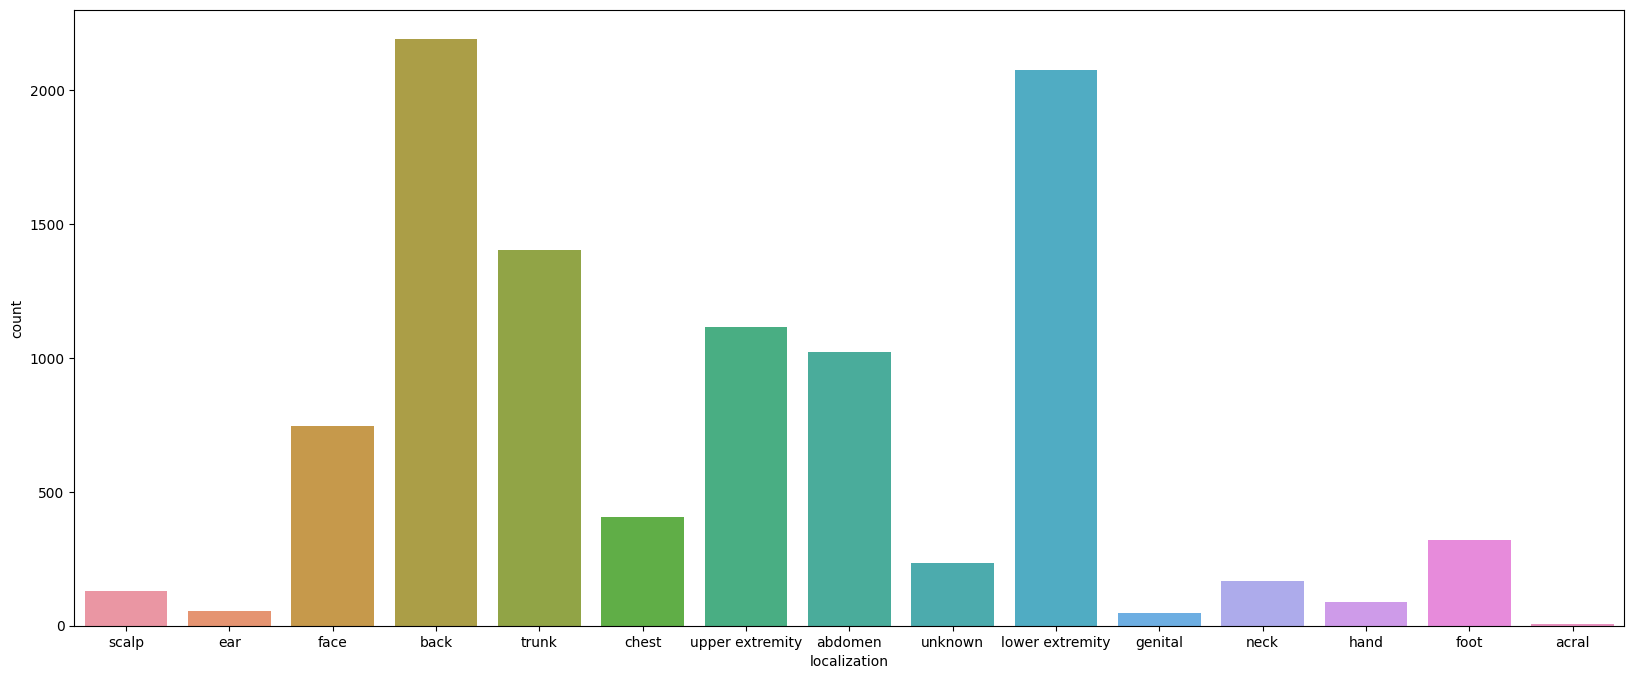

In [ ]:
print("Localization : {}".format(tabular_data['localization'].unique()))
plt.figure(figsize=(20 , 8))
sns.countplot(x='localization'  , data=tabular_data)

<Axes: xlabel='sex', ylabel='count'>

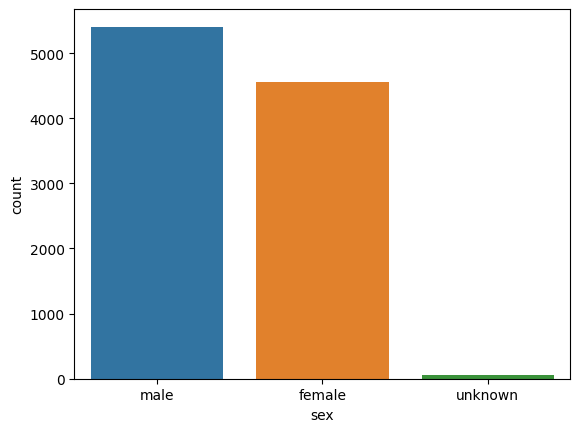

In [ ]:
sns.countplot(x='sex' , data=tabular_data)

In [ ]:
tabular_data.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

In [ ]:
tabular_data['dx'].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [ ]:
def get_range(age):
    if age <= 20:
        return "0-20"
    elif age>20 and age<=30:
        return "21-30"
    elif age>30 and age <=40:
        return "31-40"
    elif age>40 and age<=50:
        return "41-50"
    elif age>50 and age<=60:
        return "51-60"
    elif age>60 and age<=70:
        return "61-70"
    else:
        return "70+"
tabular_data['range']=tabular_data['age'].apply(get_range)


In [ ]:
def get_diseases_name(diseases):
    if diseases=='nv':
        return  'melanocytic nevi'
    elif diseases=='mel':
        return 'melanoma'
    elif diseases=='bkl':
        return 'benign keratosis-like lesions'
    elif diseases=='bcc':
        return 'basal cell carcinoma'
    elif diseases=='vasc':
        return 'pyogenic granulomas and hemorrhage'
    elif diseases=='akiec':
        return 'Actinic keratoses and intraepithelial carcinomae'
    elif diseases=='df':
        return 'dermatofibroma'
tabular_data['diseases_name']=tabular_data['dx'].apply(get_diseases_name)

In [ ]:
tabular_data.head()

lesion_id      image_id   dx dx_type   age   sex localization range  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   70+   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   70+   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   70+   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   70+   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   70+   

                   diseases_name  
0  benign keratosis-like lesions  
1  benign keratosis-like lesions  
2  benign keratosis-like lesions  
3  benign keratosis-like lesions  
4  benign keratosis-like lesions

<Axes: xlabel='range', ylabel='count'>

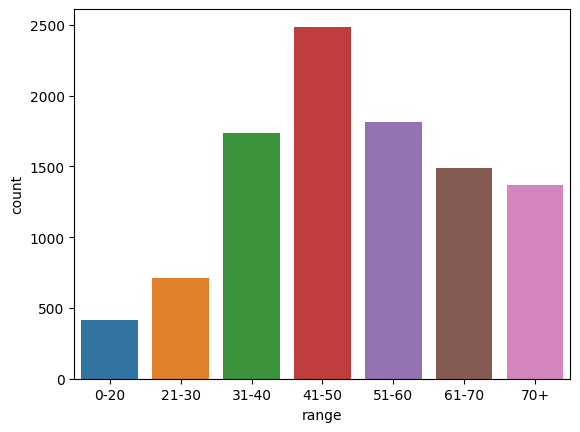

In [ ]:
sort_range=["0-20" , "21-30" , "31-40" , "41-50" , "51-60" ,"61-70" , "70+" ]
sns.countplot(x='range' , data=tabular_data , order=sort_range)

<Axes: xlabel='diseases_name', ylabel='count'>

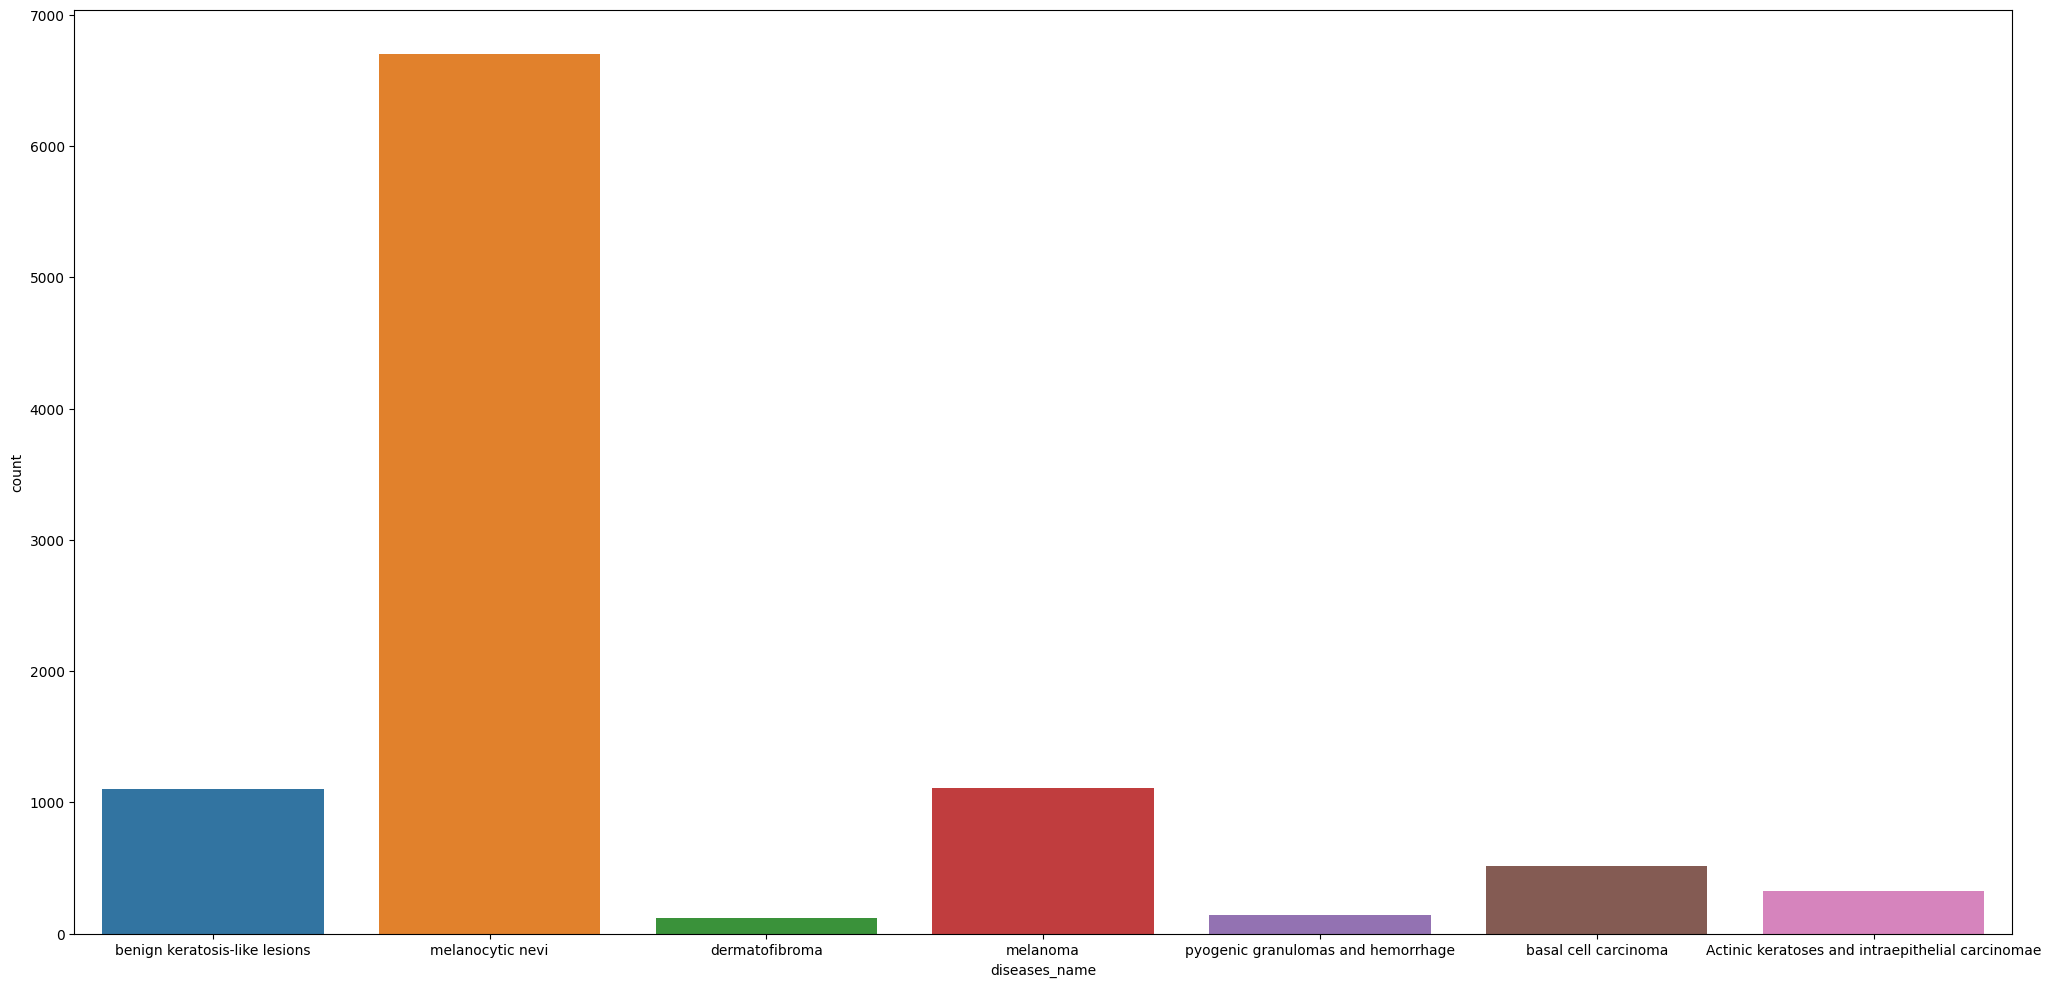

In [ ]:
plt.figure(figsize=(25 ,12))
sns.countplot(x='diseases_name' , data =tabular_data)

<Axes: xlabel='dx', ylabel='count'>

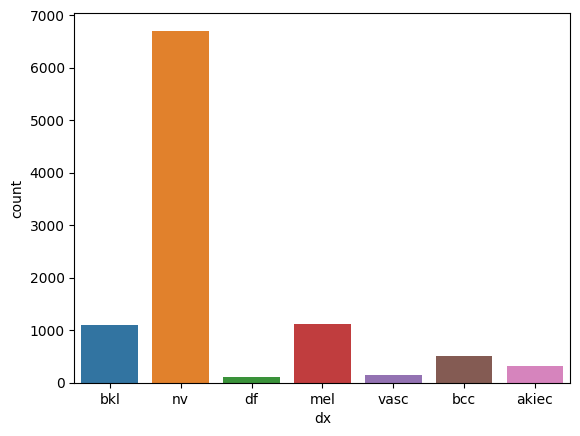

In [ ]:
sns.countplot(x='dx' , data = tabular_data)

Text(0.5, 1.0, 'Range of age wrt to diseases')

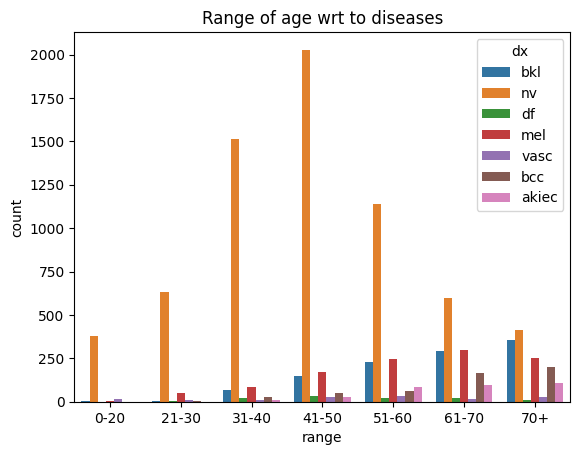

In [ ]:
sns.countplot(x='range' , data=tabular_data , order=sort_range , hue= 'dx')
plt.title("Range of age wrt to diseases")

In [ ]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

In [ ]:
tabular_data.head()

lesion_id      image_id   dx dx_type   age   sex localization range  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   70+   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   70+   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   70+   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   70+   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   70+   

                   diseases_name  
0  benign keratosis-like lesions  
1  benign keratosis-like lesions  
2  benign keratosis-like lesions  
3  benign keratosis-like lesions  
4  benign keratosis-like lesions

Text(0.5, 1.0, 'Count of diseases wrt gender')

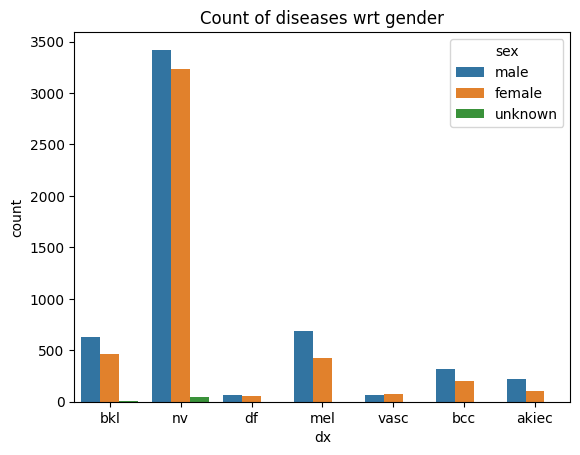

In [ ]:
sns.countplot(x='dx' , data=tabular_data , hue='sex')
plt.title("Count of diseases wrt gender")

<Axes: xlabel='localization', ylabel='count'>

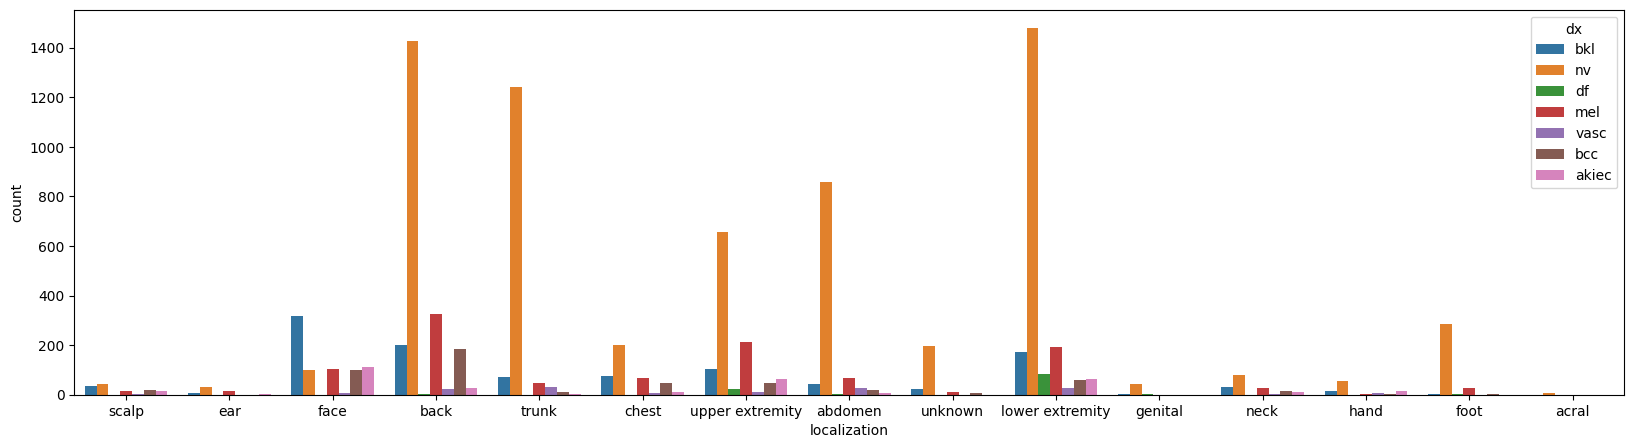

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(x='localization' , data=tabular_data , hue='dx')

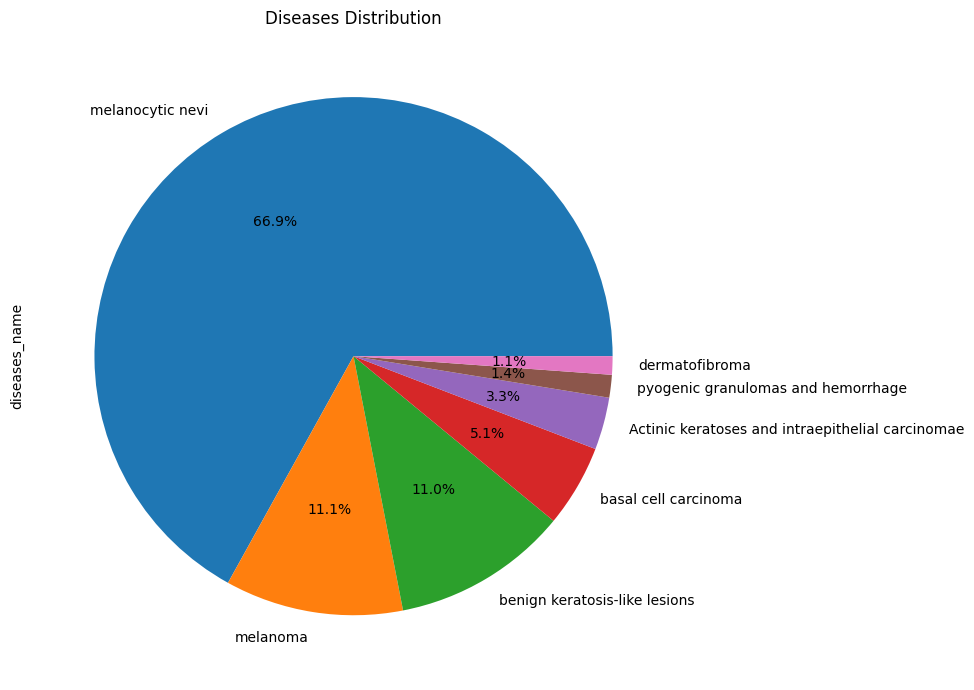

In [ ]:
plt.figure(figsize=(10 , 7))
diseases=tabular_data['diseases_name'].value_counts()
percentages = diseases / diseases.sum() * 100
diseases.plot(kind='pie' , autopct='%1.1f%%')
plt.title('Diseases Distribution')
plt.tight_layout()

In [ ]:
classes

{4: ('nv', ' melanocytic nevi'),
 6: ('mel', 'melanoma'),
 2: ('bkl', 'benign keratosis-like lesions'),
 1: ('bcc', ' basal cell carcinoma'),
 5: ('vasc', ' pyogenic granulomas and hemorrhage'),
 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
 3: ('df', 'dermatofibroma')}

# Distribution of Disease over Gender

Text(0.5, 1.0, 'Gender of Patient')

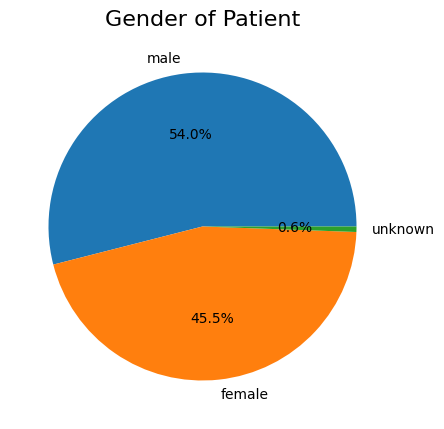

In [ ]:
bar, ax = plt.subplots(figsize = (5,5))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

# Location of disease over Gender

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

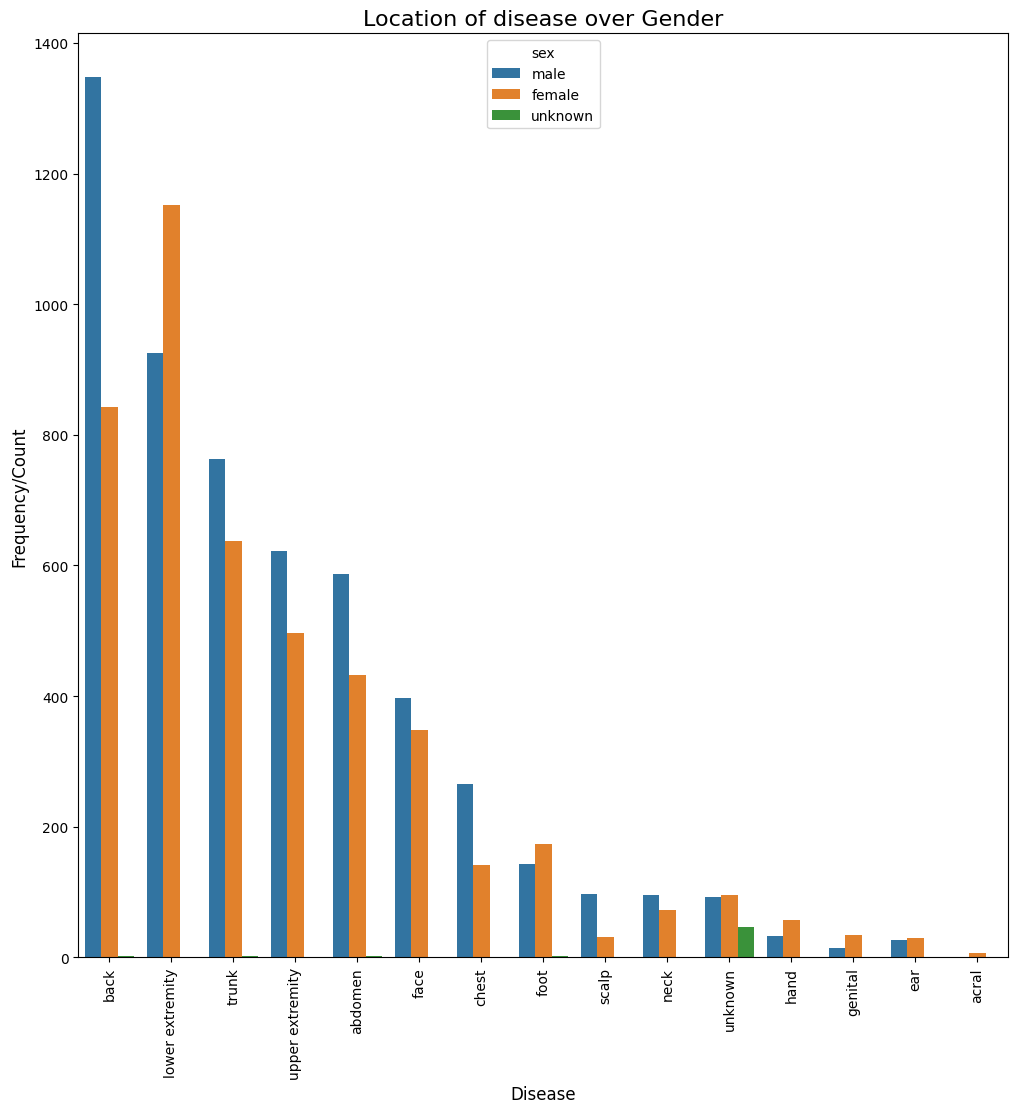

In [ ]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

In [ ]:
!nvidia-smi

Sat Apr 29 11:02:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Oversampling
**To overcome class imbalace**

In [ ]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [ ]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


# Standardization and Splitting Data

In [ ]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

# Model Training

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 20,
                    callbacks=[callback])

Epoch 1/20
235/235 [==============================] - ETA: 0s - loss: 1.2390 - accuracy: 0.5194
Epoch 1: saving model to best_model.h5
235/235 [==============================] - 16s 11ms/step - loss: 1.2390 - accuracy: 0.5194 - val_loss: 0.8603 - val_accuracy: 0.6607
Epoch 2/20
229/235 [============================>.] - ETA: 0s - loss: 0.6607 - accuracy: 0.7563
Epoch 2: saving model to best_model.h5
235/235 [==============================] - 2s 8ms/step - loss: 0.6573 - accuracy: 0.7578 - val_loss: 0.5219 - val_accuracy: 0.8097
Epoch 3/20
229/235 [============================>.] - ETA: 0s - loss: 0.4198 - accuracy: 0.8477
Epoch 3: saving model to best_model.h5
235/235 [==============================] - 2s 8ms/step - loss: 0.4172 - accuracy: 0.8485 - val_loss: 0.3973 - val_accuracy: 0.8586
Epoch 4/20
229/235 [============================>.] - ETA: 0s - loss: 0.2854 - accuracy: 0.8946
Epoch 4: saving model to best_model.h5
235/235 [==============================] - 2s 8ms/step - loss: 0.

# Plot Accuracy and Loss

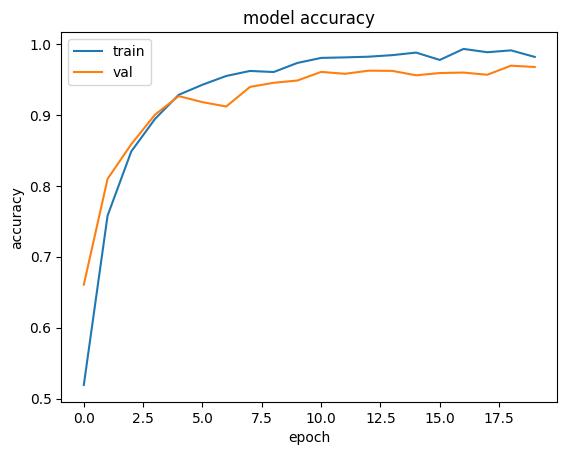

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

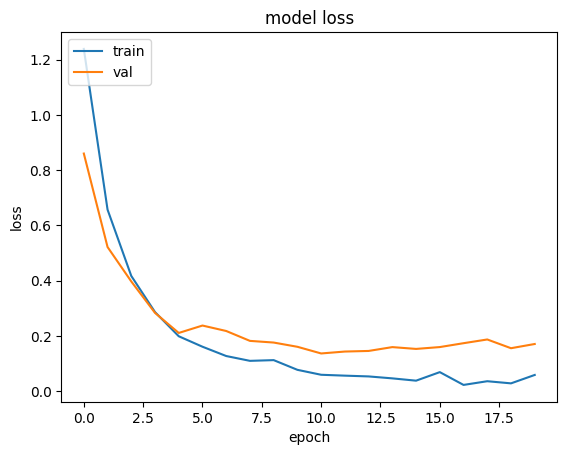

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.load_weights('best_model.h5')


# Model Testing

In [ ]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

294/294 - 1s - loss: 0.1670 - accuracy: 0.9656 - 803ms/epoch - 3ms/step


# Model Inference

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.1 MB/s eta 0:00:00


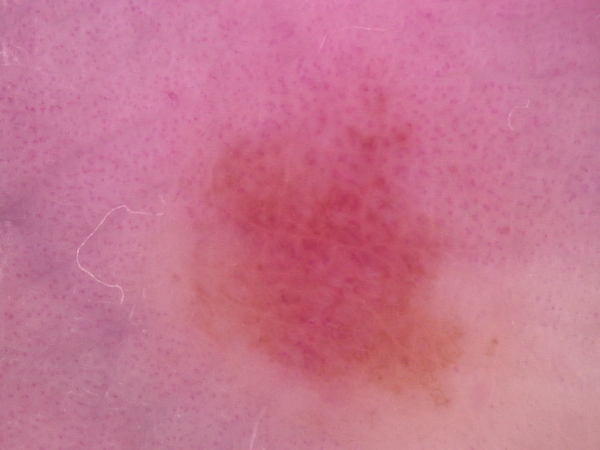

1/1 [==============================] - 0s 233ms/step
('nv', ' melanocytic nevi')


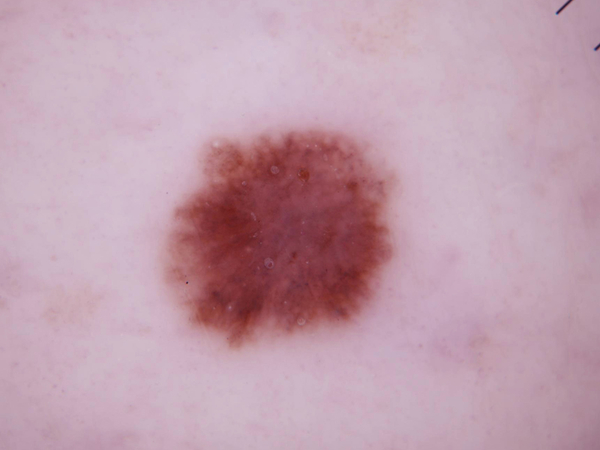

1/1 [==============================] - 0s 31ms/step
('nv', ' melanocytic nevi')


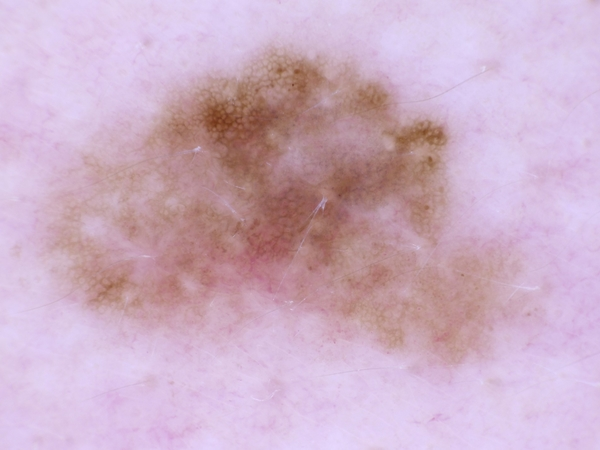

1/1 [==============================] - 0s 39ms/step
('nv', ' melanocytic nevi')


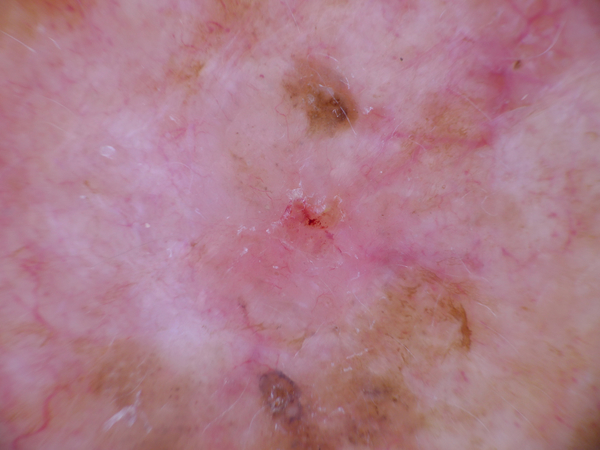

1/1 [==============================] - 0s 27ms/step
('nv', ' melanocytic nevi')


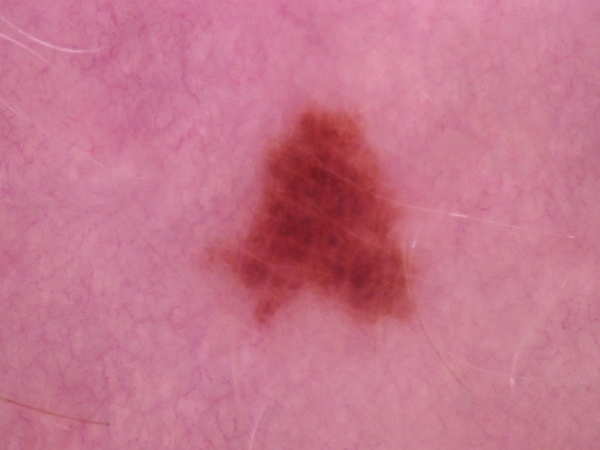

1/1 [==============================] - 0s 33ms/step
('nv', ' melanocytic nevi')


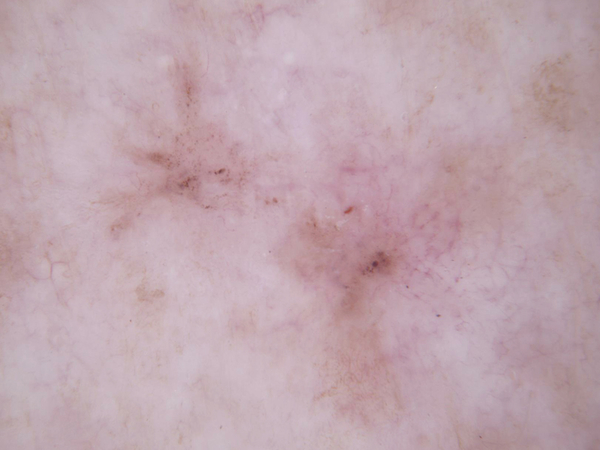

1/1 [==============================] - 0s 26ms/step
('nv', ' melanocytic nevi')


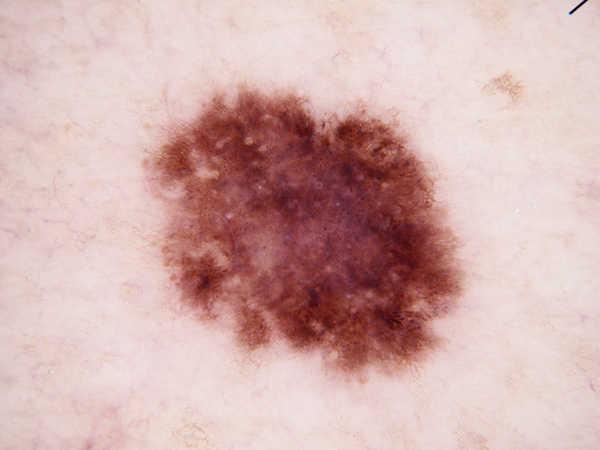

1/1 [==============================] - 0s 26ms/step
('nv', ' melanocytic nevi')


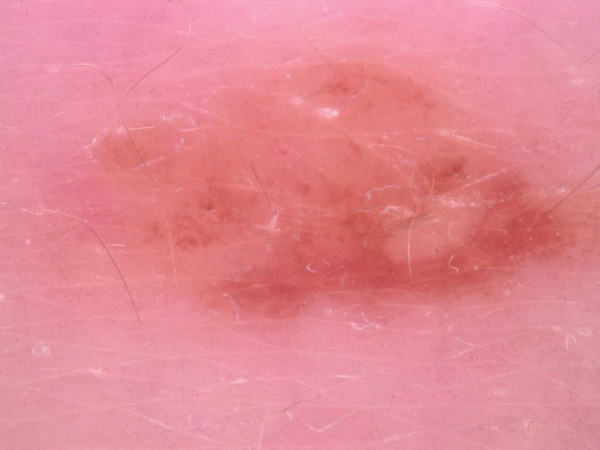

1/1 [==============================] - 0s 28ms/step
('nv', ' melanocytic nevi')


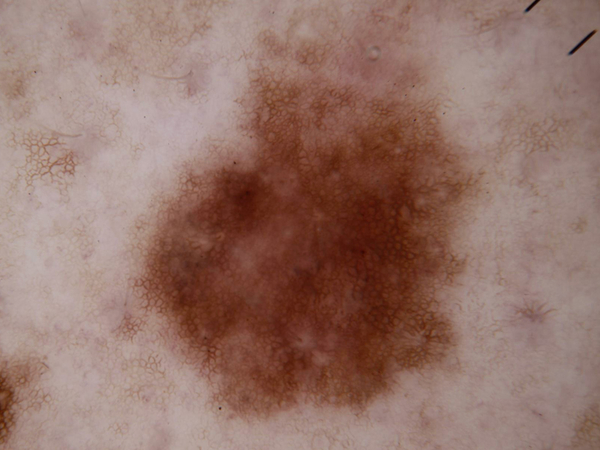

1/1 [==============================] - 0s 32ms/step
('nv', ' melanocytic nevi')


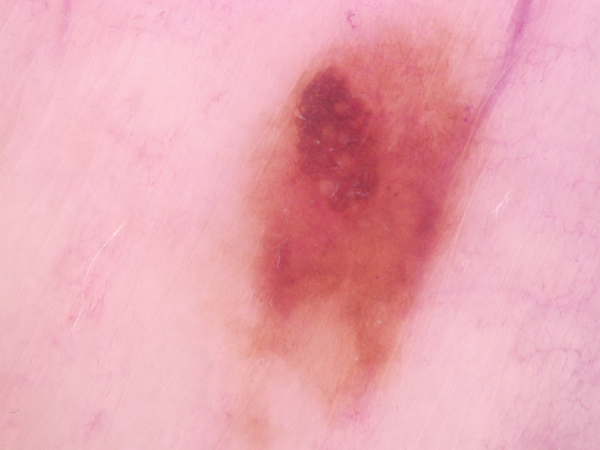

1/1 [==============================] - 0s 26ms/step
('nv', ' melanocytic nevi')


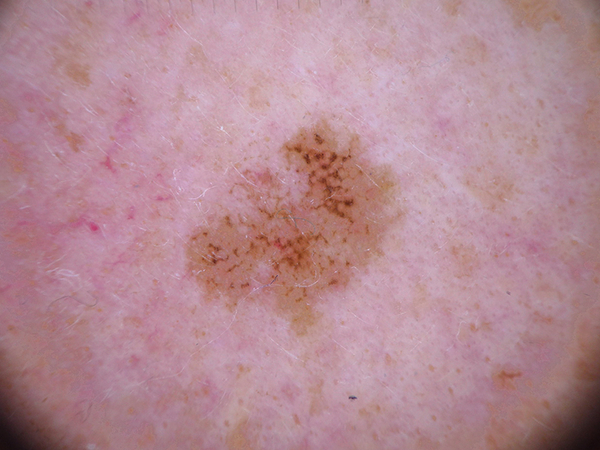

1/1 [==============================] - 0s 29ms/step
('nv', ' melanocytic nevi')


In [ ]:
!pip install google.colab
from google.colab.patches import cv2_imshow
srcdir = '/content/drive/MyDrive/dataset/HAM10000_images_part_1'
count=0
for temp in os.listdir(srcdir):
    img = cv2.imread(os.path.join(srcdir, temp))
    cv2.imwrite(temp, img)
    cv2_imshow(img)
    img = cv2.resize(img, (28, 28))
    result = model.predict(img.reshape(1, 28, 28, 3))
    max_prob = max(result[0])
    class_ind = list(result[0]).index(max_prob)
    class_name = classes[class_ind]
    print(class_name)
    count+=1
    if count>10:
        break